This notebook will illustrate how to regularization a Deep Neural Network (DNN) for a classification problem. We will use Keras and the fashion MNIST dataset.

We regularize the model when we see overfitting. This means we need to train the model exhaustedly (e.g. the train loss cannot improve) and if we tend to accept that model, we will see the variance (the gap between the train loss and validation loss): if the gap is big, the model is overfitting => we will regularize it.

Like MNIST, fashion MNIST has 60K training samples and 10K samples for testing.
Each sample is an image with the size of 28 x 28 pixels and belongs to one of ten classes. Here are 10 classes: \{"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"\}. Each pixel has a value in the range of [0..255]. Refer to https://www.kaggle.com/datasets/zalando-research/fashionmnist for details.

We will:

\#1 load the dataset and create train, dev, and test sets

\#2 prepare data for training

\#3 create a model

\#4 train the model: [a] exhaustedly train and [b] regularization

\#5 evaluate the model

\#6 perform predictions

In [2]:
###BEGIN library importing
import tensorflow as tf
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt
###END library importing

# 1. Load the dataset fashion MNIST using Keras
The dataset is already shuffled.  

50K samples for train; 10K samples for dev; 10K samples for test

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:50000], y_train_full[:50000]
X_dev, y_dev = X_train_full[50000:], y_train_full[50000:]

print(X_train.shape, y_train.shape)

(50000, 28, 28) (50000,)


# 2. Prepare data for training
normalize the value of each pixel in the range of [0..1]  to make the algorithm run faster

In [4]:
X_train, X_dev, X_test = X_train/255.0, X_dev/255.0, X_test/255.0

# 3.Create a sequential DNN model

In [17]:
# We will take the best model from the note DNN_hyperband. Which has 6 hidden layers, 200 neuron/layer, lr = 0.0005, 
# activation = tanh, optimizer = RMSprop 
# this model obtains 99% and 88% accuracy on train and dev repectively.
# I will not retrain it, just put the architecture here, but will regularize the model next step

tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200,  activation="tanh"))
model.add(tf.keras.layers.Dense(200,  activation="tanh"))
model.add(tf.keras.layers.Dense(200,  activation="tanh"))
model.add(tf.keras.layers.Dense(200,  activation="tanh"))
model.add(tf.keras.layers.Dense(200,  activation="tanh"))
model.add(tf.keras.layers.Dense(200, activation="tanh"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 250)            │        75,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 200)            │        50,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,210 (1.55 MB)

 Trainable params: 407,210 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

# 4.Train the model

[a] exhaustedly train 3 steps here: compile, fit, and plot the training curves

In [1]:
#model.compile(optimizer = "adam",
#              loss="sparse_categorical_crossentropy",
#              metrics=["accuracy"])


#history = model.fit(X_train, y_train, validation_data=(X_dev, y_dev),
#                    epochs = 100, verbose = 0, batch_size = 32)

In [2]:
#4 train the model: plot training curves
#print all data in history

#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()
# summarize history for loss
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()

#model.evaluate(X_dev, y_dev, batch_size = 5000)


### Baseline
#### Train, dev acc: 99%, 88%


# Regularization

There are techniques, including:
### Weight Decay 
We can penalize any combinations of the follows:
    - kernel (the weight)
    - bias
    - the outputs of a layer (think as the weight and bias, but after we perform the activation function)
    - regularizer can be both L1, L2, or both.  

Here let's try the L2. Note that this is not a first choice but for the purpose of teaching, I show it first as you already learned it in chapter 4.  
We can regularize the weights (kernel_regularizer), bias (bias_regularizer), or the output of a layer (activity_regularizer)

For example, `kernel_regularizer = regularizers.L1L2(l1=1e-4, l2=1e-3), bias_regularizer = regularizers.L2(1e-4), activity_regularizer = regularizers.L2(1e-4)`

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 360,010 (1.37 MB)

 Trainable params: 360,010 (1.37 MB)

 Non-trainable params: 0 (0.00 B)

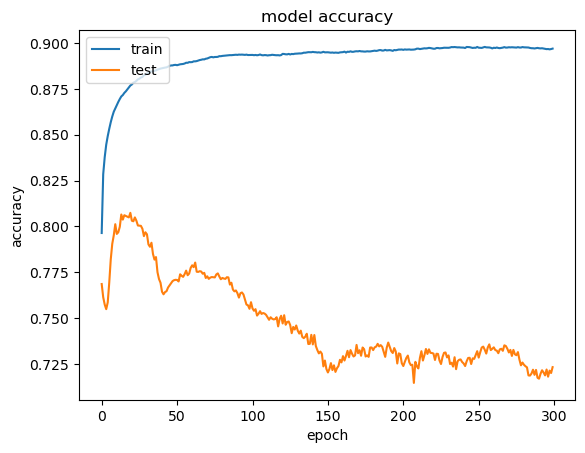

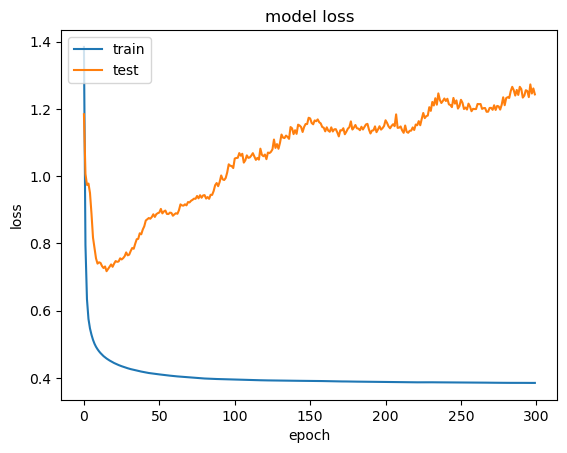

In [25]:
tf.random.set_seed(42)
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Input(shape=[28, 28]))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(200,  activation="tanh", kernel_regularizer = regularizers.L2(0.001)))
model1.add(tf.keras.layers.Dense(200,  activation="tanh", kernel_regularizer = regularizers.L2(0.001)))
model1.add(tf.keras.layers.Dense(200,  activation="tanh", kernel_regularizer = regularizers.L2(0.001)))
model1.add(tf.keras.layers.Dense(200,  activation="tanh", kernel_regularizer = regularizers.L2(0.001)))
model1.add(tf.keras.layers.Dense(200,  activation="tanh", kernel_regularizer = regularizers.L2(0.001)))
model1.add(tf.keras.layers.Dense(200,  activation="tanh", kernel_regularizer = regularizers.L2(0.001)))
model1.add(tf.keras.layers.Dense(10,   activation="softmax"))
model1.summary()

lr = 0.0005 
optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)

model1.compile(optimizer = optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


history1 = model1.fit(X_train, y_train, validation_data=(X_valid, y_valid),
                    epochs = 300, verbose = 0, batch_size = 32)

#plotting the training curve

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Base line + L2: 
#### train, dev acc: 89%, 72.5%

Clearly the L2 does not help. Let's move to the next technique

### Dropout
The key idea is to randomly drop units (along with their connections) from the neural network during training"
The detail can be found in this https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf  

We will use dropout with the same percentage after each layer to have a good sense of how the dropout work.

I pick 20% to drop.


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 360,010 (1.37 MB)

 Trainable params: 360,010 (1.37 MB)

 Non-trainable params: 0 (0.00 B)

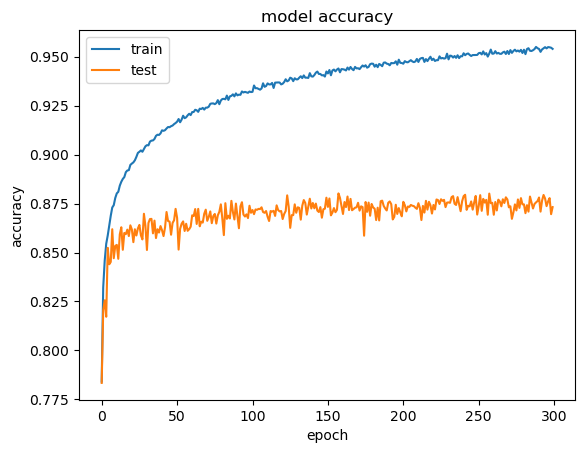

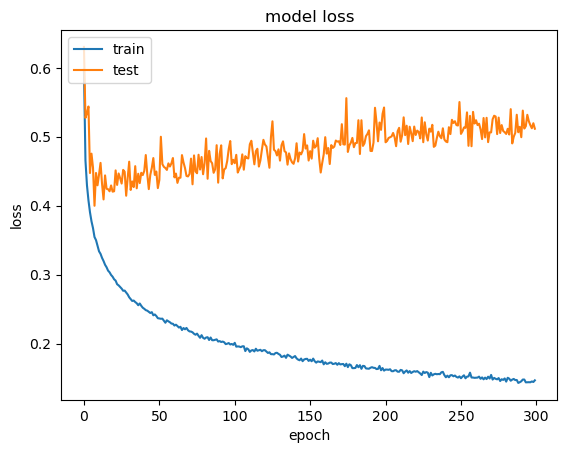

In [26]:
percent = 0.2
tf.random.set_seed(42)
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Input(shape=[28, 28]))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(200,  activation="tanh"))
model2.add(tf.keras.layers.Dropout(percent))
model2.add(tf.keras.layers.Dense(200,  activation="tanh"))
model2.add(tf.keras.layers.Dropout(percent))
model2.add(tf.keras.layers.Dense(200,  activation="tanh"))
model2.add(tf.keras.layers.Dropout(percent))
model2.add(tf.keras.layers.Dense(200,  activation="tanh"))
model2.add(tf.keras.layers.Dropout(percent))
model2.add(tf.keras.layers.Dense(200,  activation="tanh"))
model2.add(tf.keras.layers.Dropout(percent))
model2.add(tf.keras.layers.Dense(200,  activation="tanh"))
model2.add(tf.keras.layers.Dense(10,   activation="softmax"))
model2.summary()

lr = 0.0005 
optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)

model2.compile(optimizer = optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


history2 = model2.fit(X_train, y_train, validation_data=(X_valid, y_valid),
                    epochs = 300, verbose = 0, batch_size = 32)

#plotting the training curve

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Baseline + constant percent dropout 
#### train, dev acc: 95%, 87%
The 20% dropout does not help. It makes the train and dev accuracy decrease 4% and 1% respectively. The gap between train and dev accuracy is 8%, closer but it is not what we want. We want the dev accuracy is higher than 88% that is what the model obtained without regularization.  

Let's try the increasing dropout.
We will start with 5% and then add 5% at a time, after each layer

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 360,010 (1.37 MB)

 Trainable params: 360,010 (1.37 MB)

 Non-trainable params: 0 (0.00 B)

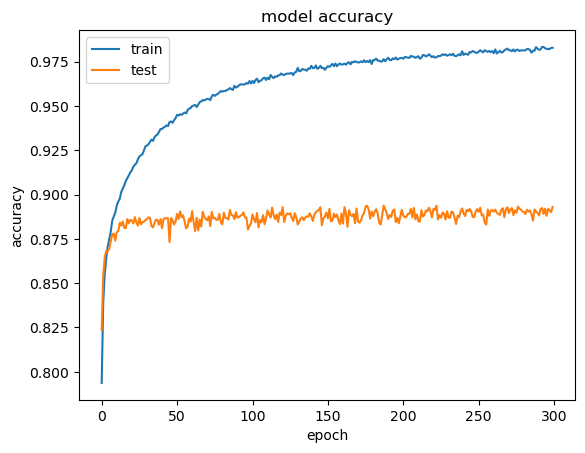

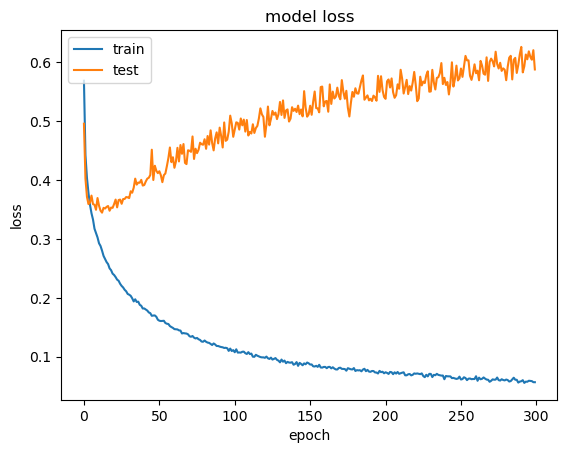

In [9]:
percent = 0.05
tf.random.set_seed(42)
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Input(shape=[28, 28]))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(200,  activation="tanh"))
model2.add(tf.keras.layers.Dropout(percent))
model2.add(tf.keras.layers.Dense(200,  activation="tanh"))
model2.add(tf.keras.layers.Dropout(percent + 0.05))
model2.add(tf.keras.layers.Dense(200,  activation="tanh"))
model2.add(tf.keras.layers.Dropout(percent + 0.1))
model2.add(tf.keras.layers.Dense(200,  activation="tanh"))
model2.add(tf.keras.layers.Dropout(percent + 0.15))
model2.add(tf.keras.layers.Dense(200,  activation="tanh"))
model2.add(tf.keras.layers.Dropout(percent + 0.15))
model2.add(tf.keras.layers.Dense(200,  activation="tanh"))
model2.add(tf.keras.layers.Dense(10,   activation="softmax"))
model2.summary()

lr = 0.0005 
optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)

model2.compile(optimizer = optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


history2 = model2.fit(X_train, y_train, validation_data=(X_dev, y_dev),
                    epochs = 300, verbose = 0, batch_size = 32)

#plotting the training curve

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
model2.evaluate(X_train, y_train, batch_size = 5000)
model2.evaluate(X_dev, y_dev, batch_size = 5000)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9890 - loss: 0.0392
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8930 - loss: 0.5873


[0.5873221755027771, 0.8930000066757202]

### Baseline + increasing dropout
#### train, dev acc: 98.9%, 89.3% 

The increasing dropout works better to increase the dev acc by about 1%, up to 89.3% while keeping the train acc unchaged that is a good point.

We can keep trying other increasing percent values gradually.

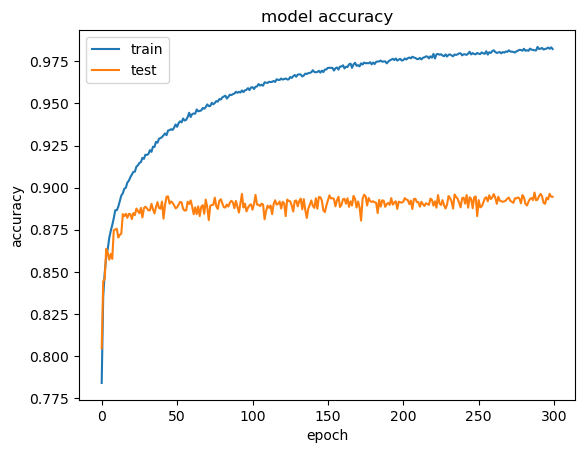

In [7]:
percent = 0.07
tf.random.set_seed(42)
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Input(shape=[28, 28]))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(200,  activation="tanh"))
model3.add(tf.keras.layers.Dropout(percent))
model3.add(tf.keras.layers.Dense(200,  activation="tanh"))
model3.add(tf.keras.layers.Dropout(percent + 0.05))
model3.add(tf.keras.layers.Dense(200,  activation="tanh"))
model3.add(tf.keras.layers.Dropout(percent + 0.1))
model3.add(tf.keras.layers.Dense(200,  activation="tanh"))
model3.add(tf.keras.layers.Dropout(percent + 0.15))
model3.add(tf.keras.layers.Dense(200,  activation="tanh"))
model3.add(tf.keras.layers.Dropout(percent + 0.15))
model3.add(tf.keras.layers.Dense(200,  activation="tanh"))
model3.add(tf.keras.layers.Dense(10,   activation="softmax"))
#model3.summary()

lr = 0.0005 
optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)

model3.compile(optimizer = optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


history3 = model3.fit(X_train, y_train, validation_data=(X_dev, y_dev),
                    epochs = 300, verbose = 0, batch_size = 64)

#plotting the training curve

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
#plt.plot(history3.history['loss'])
#plt.plot(history3.history['val_loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()

In [8]:
model3.evaluate(X_train, y_train, batch_size = 5000)
model3.evaluate(X_dev, y_dev, batch_size = 5000)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9937 - loss: 0.0206
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8946 - loss: 0.5616


[0.5616021156311035, 0.894599974155426]

Increasing the start percent to 7% helps a litle more.

You can try 10%, and 13%

### Batch Normalization

A batch normalization layer to stabilize the learning and perhaps accelerate the learning process.

We will add a BatchNormalization layer before dropout

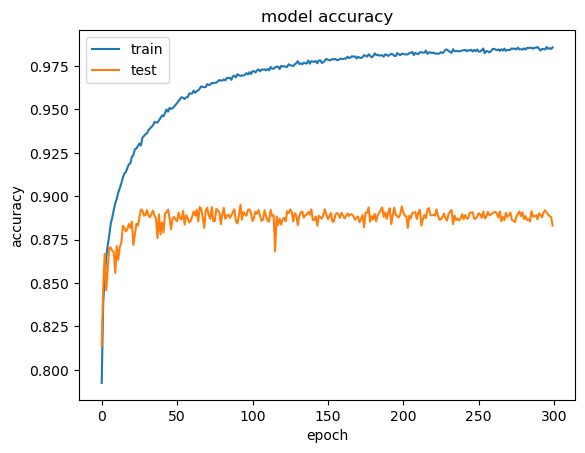

In [9]:
percent = 0.10
tf.random.set_seed(42)
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Input(shape=[28, 28]))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(200,  activation="tanh"))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Dropout(percent))

model3.add(tf.keras.layers.Dense(200,  activation="tanh"))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Dropout(percent + 0.05))

model3.add(tf.keras.layers.Dense(200,  activation="tanh"))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Dropout(percent + 0.1))

model3.add(tf.keras.layers.Dense(200,  activation="tanh"))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Dropout(percent + 0.15))

model3.add(tf.keras.layers.Dense(200,  activation="tanh"))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Dropout(percent + 0.15))

model3.add(tf.keras.layers.Dense(200,  activation="tanh"))
model3.add(tf.keras.layers.Dense(10,   activation="softmax"))
#model3.summary()

lr = 0.0005 
optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)

model3.compile(optimizer = optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


history3 = model3.fit(X_train, y_train, validation_data=(X_dev, y_dev),
                    epochs = 300, verbose = 0, batch_size = 64)

#plotting the training curve

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
#plt.plot(history3.history['loss'])
#plt.plot(history3.history['val_loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()

In [10]:
model3.evaluate(X_train, y_train, batch_size = 5000)
model3.evaluate(X_dev, y_dev, batch_size = 5000)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9750 - loss: 0.0916
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8832 - loss: 0.6294


[0.6294015645980835, 0.8831999897956848]

### Baseline + increasing dropout + batchnormalization
train, dev acc: 97.5%, 88.3%

Increasing dropout with starting of 10% does not help.

Now the direction is to try incresing dropout with 7% < starting percent < 10%